# Pumpkins Price Prediction Model via Linear and Polynomial Regression

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
pumpkins = pd.read_csv('US-pumpkins.csv')

In [4]:
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [5]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [6]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [7]:
price = pumpkins['Low Price'] + pumpkins['High Price']/2
month = pd.DatetimeIndex(pumpkins['Date']).month


In [8]:
new_pumpkins = pd.DataFrame({'Month': month, 
                             'Package': pumpkins['Package'], 
                             'Low Price': pumpkins['Low Price'],
                             'High Price': pumpkins['High Price'],
                             'Price': price})
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,410.0
1,5,24 inch bins,270.0,280.0,410.0
2,9,24 inch bins,160.0,160.0,240.0
3,9,24 inch bins,160.0,160.0,240.0
4,11,24 inch bins,90.0,100.0,140.0


In [9]:
print(pumpkins['Package'])

0        24 inch bins
1        24 inch bins
2        24 inch bins
3        24 inch bins
4        24 inch bins
            ...      
1752    22 lb cartons
1753     36 inch bins
1754     36 inch bins
1755     36 inch bins
1756     36 inch bins
Name: Package, Length: 1757, dtype: object


In [10]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [11]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [12]:
import matplotlib.pyplot as plt

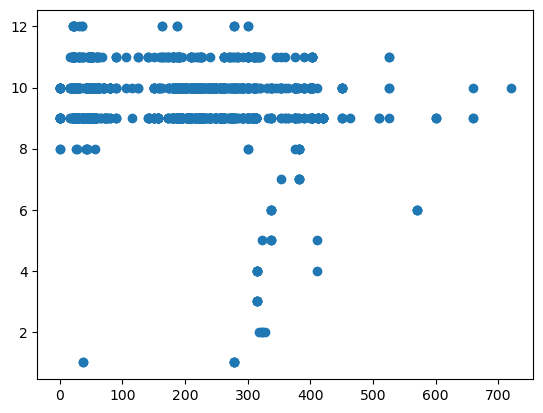

In [13]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

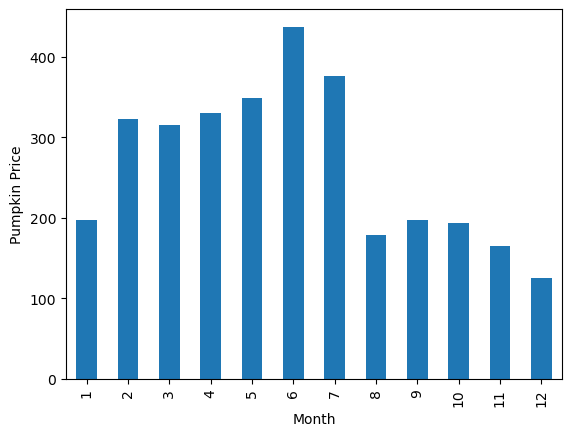

In [14]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [15]:
pumpkins_set = pd.read_csv('US-pumpkins.csv')

In [16]:
pumpkins_set.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [17]:
pumpkins_set = pumpkins_set[pumpkins_set['Package'].str.contains('bushel', case=True, regex=True)]

In [18]:
columns_to_select_2 = ['Package', 'City Name',  'Variety', 'Low Price', 'High Price', 'Date']
pumpkins_set = pumpkins_set.loc[:, columns_to_select_2]

In [19]:
prices = (pumpkins_set['Low Price'] +  pumpkins_set['High Price']) / 2

In [20]:
month = pd.DatetimeIndex(pumpkins_set['Date']).month
day_of_year = pd.to_datetime(pumpkins_set['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

In [21]:
pumpkins_set.isnull().value_counts()

Package  City Name  Variety  Low Price  High Price  Date 
False    False      False    False      False       False    415
dtype: int64

In [22]:
new_pumpkins_set = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins_set['Variety'],
     'City': pumpkins_set['City Name'], 
     'Package': pumpkins_set['Package'], 
     'Low Price': pumpkins_set['Low Price'],
     'High Price': pumpkins_set['High Price'], 
     'Prices': prices})

new_pumpkins_set.loc[new_pumpkins_set['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins_set.loc[new_pumpkins_set['Package'].str.contains('1/2'), 'Price'] = price*2

In [23]:
new_pumpkins_set.head()

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Prices,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0,18.409091
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0,22.090909
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0,22.090909
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,17.0,20.863636
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0,18.409091


In [24]:
new_pumpkins_set.dropna(inplace = True)
new_pumpkins_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 70 to 1742
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       368 non-null    int64  
 1   DayOfYear   368 non-null    int64  
 2   Variety     368 non-null    object 
 3   City        368 non-null    object 
 4   Package     368 non-null    object 
 5   Low Price   368 non-null    float64
 6   High Price  368 non-null    float64
 7   Prices      368 non-null    float64
 8   Price       368 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.8+ KB


In [25]:
new_pumpkins_set.isnull().sum()

Month         0
DayOfYear     0
Variety       0
City          0
Package       0
Low Price     0
High Price    0
Prices        0
Price         0
dtype: int64

In [26]:
new_pumpkins_set.shape

(368, 9)

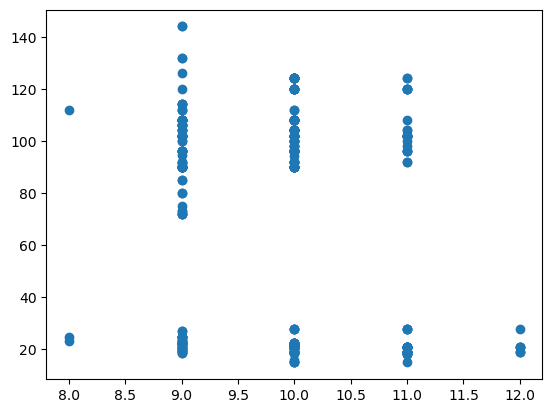

In [27]:
plt.scatter('Month','Price',data=new_pumpkins_set)


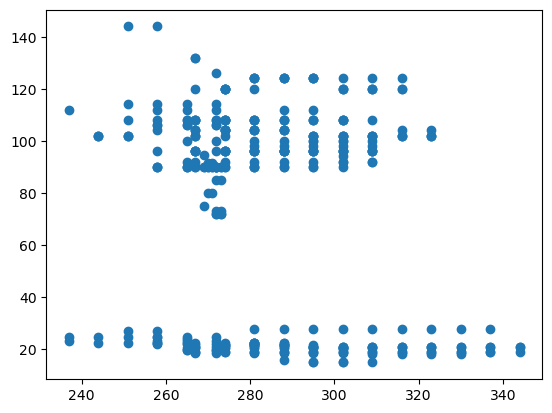

In [28]:
plt.scatter('DayOfYear', 'Price', data = new_pumpkins_set)

In [29]:
print(new_pumpkins_set['Month'].corr(new_pumpkins_set['Price']))

-0.16156979033398902


In [30]:
print(new_pumpkins_set['DayOfYear'].corr(new_pumpkins_set['Price']))

-0.17970646531931192


C:\Users\shivani patwa\miniconda3\envs\myenvironment\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


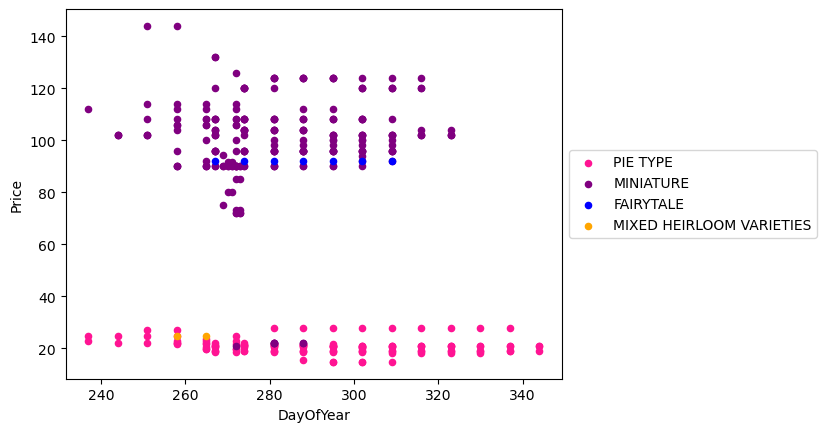

In [31]:
ax = None
colors = ['deeppink', 'purple', 'blue', 'orange']
for i ,var in enumerate (new_pumpkins_set['Variety'].unique()):
    df = new_pumpkins_set[new_pumpkins_set['Variety']==var]
    ax = df.plot.scatter('DayOfYear', 'Price', ax=ax ,c=colors[i],label=var)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: xlabel='Variety'>

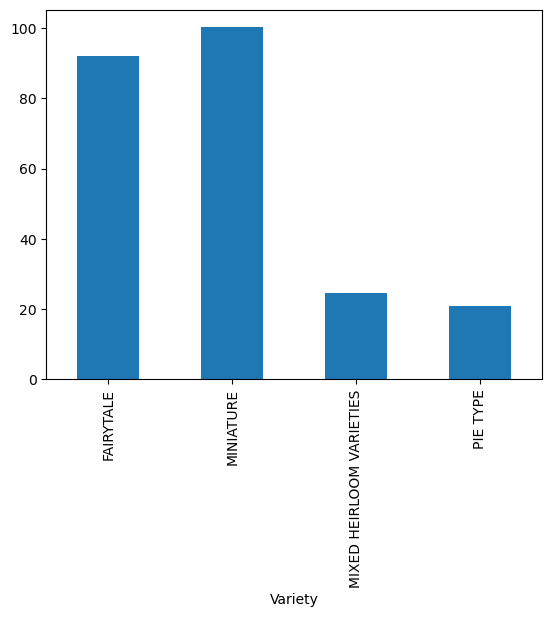

In [32]:
new_pumpkins_set.groupby('Variety')['Price'].mean().plot(kind='bar')


C:\Users\shivani patwa\miniconda3\envs\myenvironment\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='DayOfYear', ylabel='Price'>

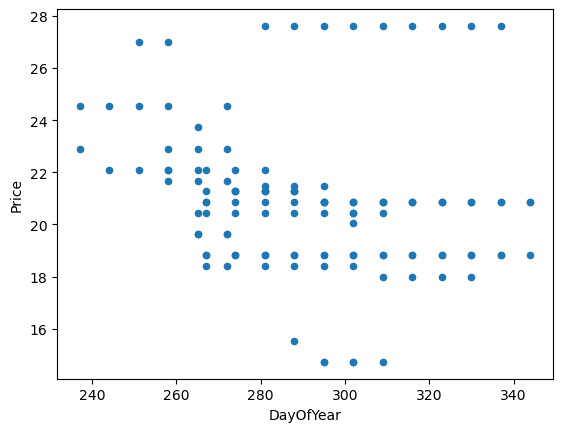

In [33]:
pie_pumpkins = new_pumpkins_set[new_pumpkins_set['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 

In [34]:
print(pie_pumpkins['Month'].corr(pie_pumpkins['Price']))

-0.15662219607404085


In [35]:
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

-0.20186689498773158


In [36]:
print(pie_pumpkins.shape)

(125, 9)


In [37]:
pie_pumpkins.dropna(inplace = True)
pie_pumpkins.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 70 to 1630
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       125 non-null    int64  
 1   DayOfYear   125 non-null    int64  
 2   Variety     125 non-null    object 
 3   City        125 non-null    object 
 4   Package     125 non-null    object 
 5   Low Price   125 non-null    float64
 6   High Price  125 non-null    float64
 7   Prices      125 non-null    float64
 8   Price       125 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 9.8+ KB


C:\Users\shivani patwa\AppData\Local\Temp\ipykernel_25576\3261530001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace = True)


# And here we are starting Linear Regression....😺

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [39]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [42]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 3.06 (14.7%)


In [43]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.0418315863137978


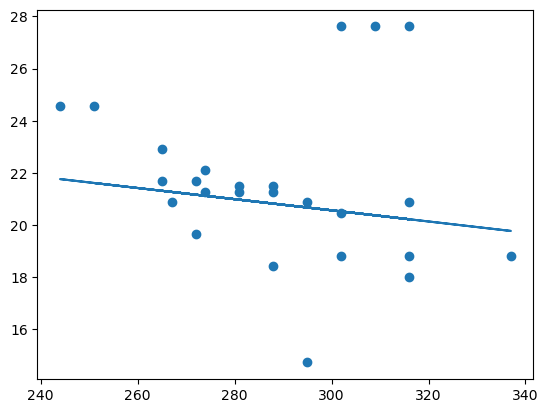

In [44]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

# Let's begin with Polynomial regression....!!😉

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [46]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [47]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [48]:
pred_ = pipeline.predict(X_test)
pred_

array([20.12930843, 21.32336262, 19.85677568, 20.00304565, 19.94069172,
       19.87756033, 20.82064388, 21.48622728, 20.42262581, 19.94069172,
       20.12930843, 20.00304565, 19.85677568, 21.00770568, 22.86559576,
       20.82064388, 20.00304565, 23.71233101, 20.95359406, 20.00304565,
       20.42262581, 21.48622728, 20.95359406, 20.12930843, 19.85677568])

In [49]:
mse = np.sqrt(mean_squared_error(y_test,pred_))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred_)*100:3.3}%)')

Mean error: 3.07 (14.9%)


In [50]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.0418315863137978


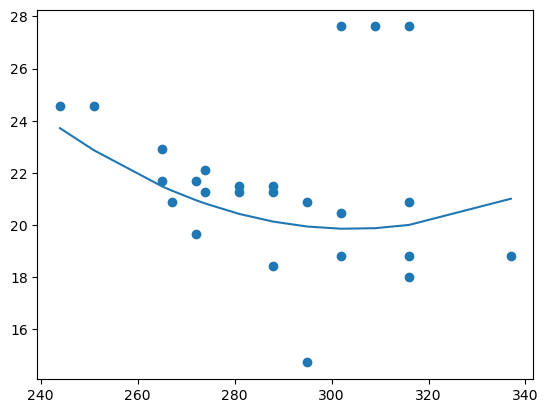

In [51]:
plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### We are seeing that our model's MSE in still not good so, let's use multiple feature to make our model stronger....🙃🫠

In [52]:
#using dummies to convert string value to numerical value.
pd.get_dummies(new_pumpkins_set['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


### At first, let's try linear regression with multiple features ....

In [53]:
X = pd.get_dummies(new_pumpkins_set['Variety']) \
.join(new_pumpkins_set['Month'])\
.join(pd.get_dummies(new_pumpkins_set['City']))\
.join(pd.get_dummies(new_pumpkins_set['Package']))
y = new_pumpkins_set['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [55]:
pred = lin_reg.predict(X_test)
pred

array([ 97.46429158,  24.33697643, 100.0057063 ,  98.69921072,
        17.21809533,  83.325     ,  97.46429158, 102.83376719,
       102.83376719,  18.45301447,  23.37943078,  22.0729352 ,
       105.88966825,  22.58757094, 123.30129912,  83.325     ,
       101.52727161,  96.15779601, 105.88966825,  22.0729352 ,
        22.0729352 , 103.62562703,  91.67337611,  21.20111435,
       105.88966825,  25.643472  ,  19.30034078, 123.30129912,
        97.46429158,  83.325     ,  23.37943078,  98.77078716,
        18.45301447,  98.69921072,  20.67520617,  18.45301447,
        91.67337611,  23.37943078,  18.95806969,  90.36688053,
        22.62595032, 123.30129912, 102.31913146, 102.31913146,
        19.75951005, 123.30129912, 102.31913146, 104.93212261,
       102.83376719,  20.60683636, 104.93212261, 102.83376719,
       101.52727161,  22.0729352 ,  97.46429158,  20.67520617,
        98.69921072,  22.0729352 ,  98.77078716,  18.52459091,
       103.62562703, 105.88966825,  18.45301447,  96.15

In [56]:
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 4.92 (7.06%)


In [57]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.9780306856413986


###  And then, polynomial regression with multiple features...

In [58]:
X = pd.get_dummies(new_pumpkins_set['Variety']) \
.join(new_pumpkins_set['Month'])\
.join(pd.get_dummies(new_pumpkins_set['City']))\
.join(pd.get_dummies(new_pumpkins_set['Package']))
y = new_pumpkins_set['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [59]:

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [60]:
# predict results for test data
pred = pipeline.predict(X_test)
print(pred)

[ 95.77705512  14.08941265 101.20020654  97.06747726  18.06977677
  83.325       95.77705512  97.28571429  97.28571429  19.43134136
  21.97015384  22.23212056 104.9103427   96.45697892 123.61710982
  83.325      108.          94.43953358 104.9103427   22.23212056
  22.23212056 103.57854794  92.          24.0904991  104.9103427
  19.15215406  18.95842849 123.61710982  95.77705512  83.325
  21.97015384  98.56379225  19.43134136  97.06747726  18.
  19.43134136  92.          21.97015384  18.68079743  93.44921559
  22.09090909 123.61710982 101.92979072 101.92979072  21.6533467
 123.61710982 101.92979072 106.67652076  97.28571429  20.92188187
 106.67652076  97.28571429 108.          22.23212056  95.77705512
  18.          97.06747726  22.23212056  98.56379225  18.94578996
 103.57854794 104.9103427   19.43134136  94.43953358 108.
  83.325       18.          21.97015384  97.28571429  23.15740271
  18.4441907  106.67652076  94.43953358 101.92979072]


In [61]:
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 9.57 (13.6%)


In [62]:
score =pipeline.score(X_train, y_train)
print('Model determination: ', score)

Model determination:  0.9824523223310424
